In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [3]:
import tensorflow as tf
from tensorflow import keras

Download and prepare the MNIST dataset

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Create Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Add Dense layer on top

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 30s 494us/sample - loss: 0.1428 - accuracy: 0.9573
Epoch 2/5
60000/60000 [==============================] - 29s 476us/sample - loss: 0.0472 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 29s 485us/sample - loss: 0.0334 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0248 - accuracy: 0.9921
Epoch 5/5
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0210 - accuracy: 0.9935


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 162us/sample - loss: 0.0319 - accuracy: 0.9901


In [11]:
print(test_acc)

0.9901


TEST single image

In [12]:
image = (train_images[1]).reshape(1,28,28,1) # 1->'2';    
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 0


Testing multiple images

Test images shape: (4, 28, 28)
Predicted digit: 6
Predicted digit: 0
Predicted digit: 4
Predicted digit: 5


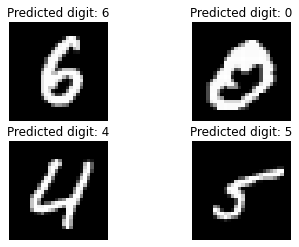

In [13]:

test_images = train_images[62:66]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

# NOW TRYING FOR HYPERPARAMETER TUNING

In [31]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [2,3]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.MaxPooling2D(pool_size=(2, 2))
    ,  
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size=(2, 2))
      ,
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [2,3]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [15]:
!pip install keras-tuner

     |████████████████████████████████| 54 kB 669 kB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73198 sha256=09760be81284c98ba3d839f45aaf2bf5b1398689240df565888c77ea5ec4002b
  Stored in directory: /root/.cache/pip/wheels/33/f0/c8/218919df808b66696bdb2fbc2261ae74412383483226b0b31d
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=53b5f95ebdc2707b37015d1aae8b974ba3c51e1d499fd5f790b9246477f7743d
  Stored in directory: /root/.cache/pip/wheels/86/1b/58/c23af2fe683acd8edc15d5a1268f0242be1ff2cf827fe34737
Successfully built keras-tuner terminaltables


In [27]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [32]:
train_images.shape

(60000, 28, 28, 1)

In [33]:
test_images.shape

(10000, 28, 28, 1)

In [34]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [35]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name="MNIST DIGIT RECOGNITION")

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-31-71e09486e17d>", line 9, in build_model
    keras.layers.MaxPooling2D('max_1_pool',pool_size=[2,2])
TypeError: __init__() got multiple values for argument 'pool_size'


RuntimeError: Too many failed attempts to build model.

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
test_acc